# Assignment 1(due on 11/08)

## Student:冯汇然（12231095），Gtihub：IreneAtmos

## 批改人：吴昊天

## 得分：50/50

<font color=orange size=3>冯汇然, 12231095, Assignment 02, Due: 11/08 19:00

# 1. Significant earthquakes since 2150 B.C.
The [Significant Earthquake Database](https://www.ngdc.noaa.gov/hazel/view/hazards/earthquake/event-data) contains information on destructive earthquakes from 2150 B.C. to the present. On the top left corner, select all columns and download the entire significant earthquake data file in `.tsv` format by clicking the `Download TSV` File button. Click the variable name for more information. Read the file (e.g., `earthquakes-2023-10-24_16-20-01_+0800.tsv`) as an object and name it `Sig_Eqs`.

**1.1 [5 points]** Compute the total number of deaths caused by earthquakes since 2150 B.C. in each country, and then print the top ten countries along with the total number of deaths.

**1.2 [10 points]** Compute the total number of earthquakes with magnitude larger than `6.0` (use column `Mag` as the magnitude) worldwide each year, and then plot the time series. Do you observe any trend? Explain why or why not?

**1.3 [10 points]** Write a function `CountEq_LargestEq` that returns both (1) the total number of earthquakes since 2150 B.C. in a given country AND (2) the date of the largest earthquake ever happened in this country. Apply `CountEq_LargestEq` to every country in the file, report your results in a descending order.

## ANS. 1.1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the earthquake data into a DataFrame
Sig_Eqs = pd.read_table('earthquakes-2023-11-01_21-34-03_+0800.tsv')

# Drop the useless index and column
Sig_Eqs = Sig_Eqs.drop(index=0, columns='Search Parameters')

# Show the index, columns, and values in this 'tsv' table
Sig_Eqs

,Id,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Country,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
1,1.0,-2150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JORDAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,SYRIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TURKMENISTAN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,5877.0,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,GREECE,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
5,8.0,-1566.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISRAEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6394,10708.0,2023.0,10.0,7.0,6.0,41.0,3.0,NaN,NaN,AFGHANISTAN,...,NaN,NaN,1950.0,4.0,NaN,3.0,2862.0,4.0,250.0,3.0
6395,10711.0,2023.0,10.0,7.0,8.0,40.0,13.0,NaN,NaN,PAPUA NEW GUINEA,...,NaN,NaN,NaN,NaN,NaN,2.0,200.0,3.0,NaN,2.0
6396,10709.0,2023.0,10.0,8.0,20.0,25.0,23.0,5891.0,NaN,JAPAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6397,10710.0,2023.0,10.0,11.0,0.0,41.0,56.0,NaN,NaN,AFGHANISTAN,...,NaN,NaN,164.0,3.0,NaN,2.0,NaN,NaN,NaN,NaN


In [3]:
# 'Total Deaths' - Total Number of Deaths from the Earthquake and secondary effects (eg Tsunami)

# groupby('Country'): Group by Country
# .sum().sort_values(...): Sum the 'Total Deaths' of all countries, and output them in descending order
# .head(): output the first 10 lines of 'Total Deaths'
Sig_Eqs.groupby('Country').sum().sort_values('Total Deaths',ascending=0)[['Total Deaths']].head(10)

,Total Deaths
Country,
CHINA,2041929.0
TURKEY,995648.0
IRAN,758650.0
SYRIA,437700.0
ITALY,422679.0
JAPAN,356083.0
HAITI,323776.0
AZERBAIJAN,310119.0
INDONESIA,282819.0


In [4]:
# 'Deaths'- Number of Deaths from the Earthquake

# groupby('Country'): Group by Country
# .sum().sort_values(...): Sum the 'Deaths' of all countries, and output them in descending order
# Finally, output the first 10 lines of 'Deaths'
Sig_Eqs.groupby('Country').sum().sort_values('Deaths',ascending=0)[['Deaths']].head(10)

,Deaths
Country,
CHINA,2075045.0
TURKEY,1188881.0
IRAN,1011449.0
ITALY,498478.0
SYRIA,439224.0
HAITI,323478.0
AZERBAIJAN,317219.0
JAPAN,279085.0
ARMENIA,191890.0


## ANS. 1.2

In [5]:
# Add a new column named 'count'
Sig_Eqs['count'] = np.zeros(Sig_Eqs.index.shape)

# Define a custom function that checks if 'Mag' is greater than 6
def update_count(row):
    if row['Mag'] > 6:
        return 1
    else:
        return 0

# Apply the custom function to each row of the 'Sig_Eqs' DataFrame and update the 'count' column
Sig_Eqs['count'] = Sig_Eqs.apply(update_count, axis=1)
Sig_Eqs

,Id,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Country,...,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description,count
1,1.0,-2150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JORDAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2.0,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,SYRIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3.0,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TURKMENISTAN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1
4,5877.0,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,GREECE,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,0
5,8.0,-1566.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISRAEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6394,10708.0,2023.0,10.0,7.0,6.0,41.0,3.0,NaN,NaN,AFGHANISTAN,...,NaN,1950.0,4.0,NaN,3.0,2862.0,4.0,250.0,3.0,1
6395,10711.0,2023.0,10.0,7.0,8.0,40.0,13.0,NaN,NaN,PAPUA NEW GUINEA,...,NaN,NaN,NaN,NaN,2.0,200.0,3.0,NaN,2.0,1
6396,10709.0,2023.0,10.0,8.0,20.0,25.0,23.0,5891.0,NaN,JAPAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6397,10710.0,2023.0,10.0,11.0,0.0,41.0,56.0,NaN,NaN,AFGHANISTAN,...,NaN,164.0,3.0,NaN,2.0,NaN,NaN,NaN,NaN,1


[Text(0, 0, '-2150.0'),
 Text(50, 0, '27.0'),
 Text(100, 0, '348.0'),
 Text(150, 0, '565.0'),
 Text(200, 0, '845.0'),
 Text(250, 0, '1008.0'),
 Text(300, 0, '1143.0'),
 Text(350, 0, '1286.0'),
 Text(400, 0, '1375.0'),
 Text(450, 0, '1478.0'),
 Text(500, 0, '1545.0'),
 Text(550, 0, '1606.0'),
 Text(600, 0, '1661.0'),
 Text(650, 0, '1714.0'),
 Text(700, 0, '1767.0'),
 Text(750, 0, '1817.0'),
 Text(800, 0, '1867.0'),
 Text(850, 0, '1917.0'),
 Text(900, 0, '1967.0'),
 Text(950, 0, '2017.0')]

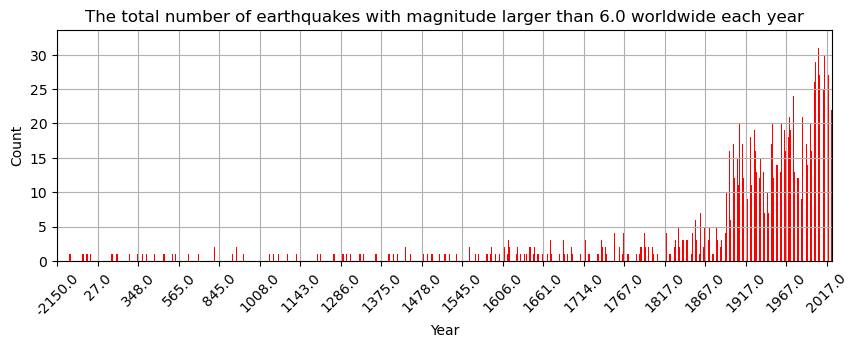

In [37]:
# Determine the year scale to show
yearly_counts = Sig_Eqs.groupby('Year').sum()['count']
years = yearly_counts.index
x_values = list(range(len(years)))

# Determine the year to display every 50 years
x_ticks = [x for x in x_values if x % 50 == 0]
x_labels = [years[x] for x in x_ticks]

# Create a bar chart
ax = yearly_counts.plot(kind='bar',
                        grid=True,
                        title='The total number of earthquakes with magnitude larger than 6.0 worldwide each year',
                        xlabel='Year',
                        ylabel='Count',
                        figsize=(10,3),
                        color='r')
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, rotation=45)

(-2250.0, 2023.0)

<Figure size 640x480 with 0 Axes>

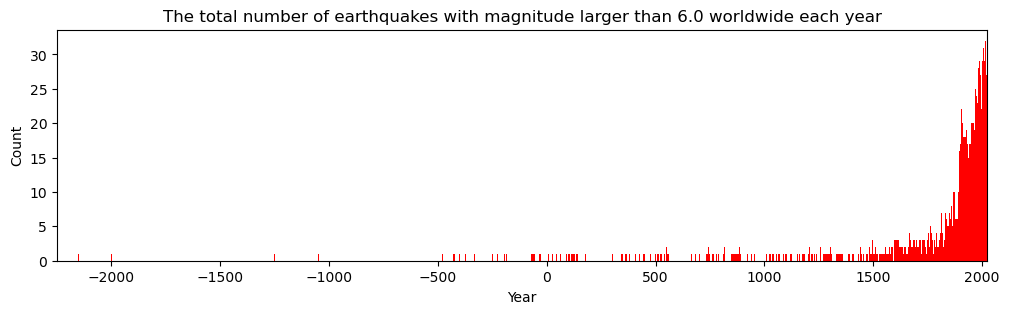

In [38]:
Sig_Eqs_2 = Sig_Eqs.loc[Sig_Eqs['Mag']>6.0].groupby(['Year']).count()['Mag']
plt.figure(2)
plt.figure(figsize=(12,3))
plt.bar(Sig_Eqs_2.index,Sig_Eqs_2,width=5,color='red')
plt.title(u'The total number of earthquakes with magnitude larger than 6.0 worldwide each year') #
plt.ylabel('Count') 
plt.xlabel('Year')
plt.xlim([min(Sig_Eqs_2.index)-100,max(Sig_Eqs_2.index)])

<font color=orange>Explaination: The total number of earthquakes with magnitude larger than 6.0 worldwide each year is `steady` from 2150 B.C. to 1817 A.D., and is `increasing` from 1817 A.D. to now.

## ANS. 1.3

In [8]:
# Add a column named 'Date', which is like '2023-10-15 3:36:0.0'
# The number '99' means 'NA'
Sig_Eqs['Date'] = Sig_Eqs['Year'].astype(int).astype(str) + '-' + \
                  Sig_Eqs['Mo'].fillna(99).astype(int).astype(str) + '-' + \
                  Sig_Eqs['Dy'].fillna(99).astype(int).astype(str) + ' ' + \
                  Sig_Eqs['Hr'].fillna(99).astype(int).astype(str) + ':' + \
                  Sig_Eqs['Mn'].fillna(99).astype(int).astype(str) + ':' + \
                  Sig_Eqs['Sec'].fillna(99).astype(str)
Sig_Eqs

,Id,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Country,...,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description,count,Date
1,1.0,-2150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JORDAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,-2150-99-99 99:99:99.0
2,2.0,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,SYRIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-2000-99-99 99:99:99.0
3,3.0,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TURKMENISTAN,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1,-2000-99-99 99:99:99.0
4,5877.0,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,GREECE,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,0,-1610-99-99 99:99:99.0
5,8.0,-1566.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISRAEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-1566-99-99 99:99:99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6394,10708.0,2023.0,10.0,7.0,6.0,41.0,3.0,NaN,NaN,AFGHANISTAN,...,1950.0,4.0,NaN,3.0,2862.0,4.0,250.0,3.0,1,2023-10-7 6:41:3.0
6395,10711.0,2023.0,10.0,7.0,8.0,40.0,13.0,NaN,NaN,PAPUA NEW GUINEA,...,NaN,NaN,NaN,2.0,200.0,3.0,NaN,2.0,1,2023-10-7 8:40:13.0
6396,10709.0,2023.0,10.0,8.0,20.0,25.0,23.0,5891.0,NaN,JAPAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2023-10-8 20:25:23.0
6397,10710.0,2023.0,10.0,11.0,0.0,41.0,56.0,NaN,NaN,AFGHANISTAN,...,164.0,3.0,NaN,2.0,NaN,NaN,NaN,NaN,1,2023-10-11 0:41:56.0


In [9]:
def CountEq_LargestEq(country_data):
    # Calculate the total number of earthquakes in the country
    total_earthquakes = len(country_data)

    # Initialize the maximum earthquake date to 'NAN'
    largest_earthquake_date = 'NAN'

    # First, check if there is any eligible data, and then try to extract the maximum earthquake date. 
    # If there is no eligible data or no maximum earthquake date, it will use the default value of "'NAN'
    if not country_data.empty:
        # Find the largest earthquake in the country
        largest_earthquake = country_data[country_data['Mag'] == country_data['Mag'].max()]

        if not largest_earthquake.empty:
            largest_earthquake_date = largest_earthquake['Date'].values[0]

    return total_earthquakes, largest_earthquake_date

In [10]:
# Create an empty list to store the results for each country
results = []

# Iterate through unique countries in the data
unique_countries = Sig_Eqs['Country'].unique()

# Total number of contries
unique_countries.shape

(157,)

In [11]:
for country in unique_countries:
    country_data = Sig_Eqs[Sig_Eqs['Country'] == country]
    total_earthquakes, largest_earthquake_date = CountEq_LargestEq(country_data)
    results.append({'Country': country, 'Total Earthquakes': total_earthquakes, 'Largest Earthquake Date': largest_earthquake_date})

In [12]:
# Convert the results to a DataFrame and sort by 'Total Earthquakes' in descending order
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Total Earthquakes', ascending=0)
results_df.head(20)

,Country,Total Earthquakes,Largest Earthquake Date
14,CHINA,620,1668-7-25 99:99:99.0
33,JAPAN,414,2011-3-11 5:46:24.1
68,INDONESIA,411,2004-12-26 0:58:53.4
7,IRAN,384,856-12-22 99:99:99.0
9,TURKEY,335,1939-12-26 23:57:23.8
5,ITALY,331,1915-1-13 6:52:38.0
52,USA,276,1964-3-28 3:36:0.0
3,GREECE,270,365-7-21 99:99:99.0
65,PHILIPPINES,224,1897-9-21 5:12:99.0
49,MEXICO,209,1899-1-24 23:43:0.0


### 代码结果正确，功能满足要求，分析内容合理。
### 注意在绘制6级以上的地震次数图件时，横坐标年份并不是均匀的，如果抽选横坐标刻度绘制，容易有歧义。
### 助教提供给您提供了绘图的参考代码，给您参考。
### 得分：24/25
### --------------------------------------------------------------------------------------------

# 2. Wind speed in Shenzhen during the past 10 years
In this problem set, we will examine how wind speed changes in Shenzhen during the past `10` years, we will take a look at the hourly weather data measured at the BaoAn International Airport. The data set is from [NOAA Integrated Surface Dataset](https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.ncdc%3AC00532/html). Download the file [2281305.zip](https://zhu-group.github.io/ese5023/download/2281305.zip), where the number `2281305` is the site ID. Extract the zip file, you should see a file named `2281305.csv`. Save the `.csv` file to your `working directory`.

Read page `8`-`9` (`POS 65-69` and `POS 70-70`) of the comprehensive [user guide](https://www.ncei.noaa.gov/data/global-hourly/doc/isd-format-document.pdf) for the detailed format of the wind data. Explain how you filter the data in your report.

**[10 points]** Plot monthly averaged wind speed as a function of the observation time. Is there a trend in monthly averaged wind speed within the past `10` years?

## ANS. 2

<font color=orange>First, I open `2281305.csv` via notepad, and choose encoding to `'utf-8'` when clicking 'save as' to `2281305_new.csv`. Otherwise, there will be errors like 'utf-8' codec can't decode byte 0x9c in position 4098: invalid start byte.

In [13]:
# Read the wind speed data into a DataFrame
Ws_SZ = pd.read_csv('2281305_new.csv',encoding='utf-8')

# Only choose 'DATE' and 'WND'
Ws_SZ = Ws_SZ[['DATE', 'WND']]

# Split 'WND' into 'direction_angle', 'direction_quality', 'type', 'speed' and 'speed_quality'
Ws_SZ[['direction_angle', 'direction_quality', 'type', 'speed', 'speed_quality']] = Ws_SZ['WND'].str.split(',', expand=True)

# Split 'DATE' into 'yyyymm' and 'ddHHMMSS'
Ws_SZ[['yyyy', 'mm', 'ddHHMMSS']] = Ws_SZ['DATE'].str.split('-', expand=True)

# yyyy + mm
Ws_SZ['yyyymm'] = Ws_SZ['yyyy'].astype(str) + '-' + Ws_SZ['mm'].astype(str)

# Show the Data Frame
Ws_SZ

C:\Users\Wu\AppData\Local\Temp\ipykernel_43456\3690991221.py:2: DtypeWarning: Columns (0,2,4,8,9,12,15,21,22,24,26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  Ws_SZ = pd.read_csv('2281305_new.csv',encoding='utf-8')


,DATE,WND,direction_angle,direction_quality,type,speed,speed_quality,yyyy,mm,ddHHMMSS,yyyymm
0,2010-01-02T00:00:00,"040,1,N,0020,1",040,1,N,0020,1,2010,01,02T00:00:00,2010-01
1,2010-01-02T01:00:00,"999,9,V,0010,1",999,9,V,0010,1,2010,01,02T01:00:00,2010-01
2,2010-01-02T02:00:00,"999,9,C,0000,1",999,9,C,0000,1,2010,01,02T02:00:00,2010-01
3,2010-01-02T03:00:00,"140,1,N,0010,1",140,1,N,0010,1,2010,01,02T03:00:00,2010-01
4,2010-01-02T04:00:00,"300,1,N,0040,1",300,1,N,0040,1,2010,01,02T04:00:00,2010-01
...,...,...,...,...,...,...,...,...,...,...,...
112346,2020-09-11T17:00:00,"170,1,N,0030,1",170,1,N,0030,1,2020,09,11T17:00:00,2020-09
112347,2020-09-11T18:00:00,"180,1,N,0040,1",180,1,N,0040,1,2020,09,11T18:00:00,2020-09
112348,2020-09-11T19:00:00,"220,1,V,0030,1",220,1,V,0030,1,2020,09,11T19:00:00,2020-09
112349,2020-09-11T20:00:00,"260,1,N,0030,1",260,1,N,0030,1,2020,09,11T20:00:00,2020-09


In [14]:
## Quality control

# 1. Drop direction_angle == 999
Ws_SZ = Ws_SZ[Ws_SZ['direction_angle'] != '999']

# 2. Drop direction_quality in [2,3,6,7]
Ws_SZ = Ws_SZ[~Ws_SZ['direction_quality'].isin(['2', '3', '6', '7'])]

# 3. Drop type == 9
Ws_SZ = Ws_SZ[Ws_SZ['type'] != '9']

# 4. Drop speed == 9999
Ws_SZ = Ws_SZ[Ws_SZ['speed'] != '999.9']
Ws_SZ['speed'] = (Ws_SZ['speed'].astype(float))/10

# 5. Drop speed_quality in [2,3,6,7]
Ws_SZ = Ws_SZ[~Ws_SZ['speed_quality'].isin(['2', '3', '6', '7'])]

## Show
Ws_SZ

,DATE,WND,direction_angle,direction_quality,type,speed,speed_quality,yyyy,mm,ddHHMMSS,yyyymm
0,2010-01-02T00:00:00,"040,1,N,0020,1",040,1,N,2.0,1,2010,01,02T00:00:00,2010-01
3,2010-01-02T03:00:00,"140,1,N,0010,1",140,1,N,1.0,1,2010,01,02T03:00:00,2010-01
4,2010-01-02T04:00:00,"300,1,N,0040,1",300,1,N,4.0,1,2010,01,02T04:00:00,2010-01
5,2010-01-02T05:00:00,"320,1,N,0050,1",320,1,N,5.0,1,2010,01,02T05:00:00,2010-01
6,2010-01-02T06:00:00,"270,1,N,0010,1",270,1,N,1.0,1,2010,01,02T06:00:00,2010-01
...,...,...,...,...,...,...,...,...,...,...,...
112346,2020-09-11T17:00:00,"170,1,N,0030,1",170,1,N,3.0,1,2020,09,11T17:00:00,2020-09
112347,2020-09-11T18:00:00,"180,1,N,0040,1",180,1,N,4.0,1,2020,09,11T18:00:00,2020-09
112348,2020-09-11T19:00:00,"220,1,V,0030,1",220,1,V,3.0,1,2020,09,11T19:00:00,2020-09
112349,2020-09-11T20:00:00,"260,1,N,0030,1",260,1,N,3.0,1,2020,09,11T20:00:00,2020-09


<Axes: title={'center': 'Monthly Wind Speed in ShenZhen Site'}, xlabel='Month', ylabel='Wind Speed (m/s)'>

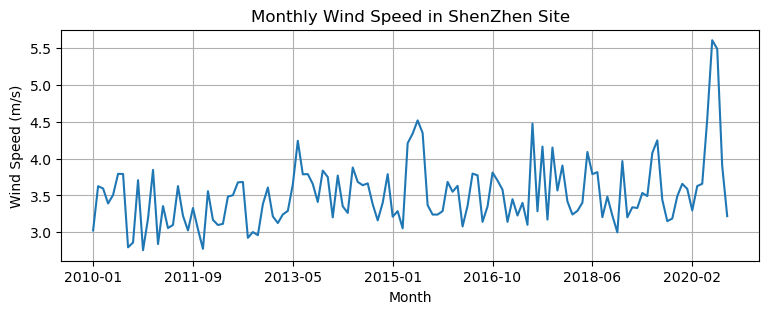

In [18]:
# Plot
Ws_SZ.groupby('yyyymm')['speed'].mean().plot(figsize=(9,3),
                                             title='Monthly Wind Speed in ShenZhen Site',
                                             ylabel='Wind Speed (m/s)',
                                             xlabel='Month',
                                             grid=True)

<font color=orange>Thus, there seems an insignificant increasing trend of wind speed from 2010-10 to 2020-02 in this Shen Zhen Site, without trend significance calculation and only obtaining it through observation.

### 代码运行结果正确，分析内容合理
### 注意代码：Ws_SZ.groupby('yyyymm').mean()['speed'].plot() 不同的库版本可能会报错，需要修改为Ws_SZ.groupby('yyyymm')['speed'].mean().plot()
### 注意逻辑：先groupby分组后，选择speed变量然后计算均值。第三题同理，助教已修改。
### 得分 10/10
### ---------------------------------------------------------------------------------------------

# 3. Explore a data set
Browse the [CASEarth](http://data.casearth.cn/), [National Centers for Environmental Information (NCEI)](https://www.ncei.noaa.gov/), or [Advanced Global Atmospheric Gases Experiment (AGAGE)](https://www.ncei.noaa.gov/) website. Search and download a data set you are interested in. You are also welcome to use data from your group in this problem set. But the data set should be in `csv`, `XLS`, or `XLSX` format, and have temporal information.

**3.1 [5 points]** Load the csv, XLS, or XLSX file, and clean possible data points with missing values or bad quality.

**3.2 [5 points]** Plot the time series of a certain variable.

**3.3 [5 points]** Conduct at least 5 simple statistical checks with the variable, and report your findings.

## ANS. 3.1

<font color=orange>I download the csv data in [hourly data in JIANGBEI CHINA, 2021](https://www.ncei.noaa.gov/data/global-hourly/access/2021/57516099999.csv) from [NCEI](https://www.ncei.noaa.gov/access/search/data-search/global-hourly?bbox=55.000,70.000,15.000,140.000&startDate=2021-01-01T23:59:59&endDate=2022-01-01T00:00:00).

In [25]:
# Read data as table
Jiangbei_df = pd.read_table('57516099999.csv',delimiter=',')

# Choose 5 columns
Jiangbei_df = Jiangbei_df[['DATE', 'WND', 'TMP', 'DEW', 'SLP']]

# Split 'WND' into 'direction_angle', 'direction_quality', 'type', 'speed' and 'speed_quality'
Jiangbei_df[['direction_angle', 'direction_quality', 'type', 'speed', 'speed_quality']] = Jiangbei_df['WND'].str.split(',', expand=True)
Jiangbei_df['speed'] = (Jiangbei_df['speed'].astype('float'))/10
Jiangbei_df['direction_angle'] = Jiangbei_df['direction_angle'].astype('float')

# Split 'TMP' into 'tmp_value' and 'tmp_quality'
Jiangbei_df[['tmp_value', 'tmp_quality']]  = Jiangbei_df['TMP'].str.split(',', expand=True).astype('float')
Jiangbei_df['tmp_value'] = Jiangbei_df['tmp_value']/10

# Split 'DEW' into 'dew_value' and 'dew_quality'
Jiangbei_df[['dew_value', 'dew_quality']] = Jiangbei_df['DEW'].str.split(',', expand=True).astype('float')
Jiangbei_df['dew_value'] = Jiangbei_df['dew_value']/10

# Split SLP into 'slp_value' and 'slp_quality'
Jiangbei_df[['slp_value', 'slp_quality']] = Jiangbei_df['SLP'].str.split(',', expand=True).astype('float')
Jiangbei_df['slp_value'] = Jiangbei_df['slp_value']/10

# Split 'DATE' into 'yyyymmdd' and 'HHMMSS'
Jiangbei_df[['yyyymmdd', 'ddHHMMSS']] = Jiangbei_df['DATE'].str.split('T', expand=True)

# Show
Jiangbei_df

,DATE,WND,TMP,DEW,SLP,direction_angle,direction_quality,type,speed,speed_quality,tmp_value,tmp_quality,dew_value,dew_quality,slp_value,slp_quality,yyyymmdd,ddHHMMSS
0,2021-01-01T00:00:00,"320,1,N,0010,1","+0060,1","+0045,1","10319,1",320.0,1,N,1.0,1,6.0,1.0,4.5,1.0,1031.9,1.0,2021-01-01,00:00:00
1,2021-01-01T00:00:00,"999,9,V,0010,1","+0050,1","+0030,1","99999,9",999.0,9,V,1.0,1,5.0,1.0,3.0,1.0,9999.9,9.0,2021-01-01,00:00:00
2,2021-01-01T01:00:00,"999,9,V,0010,1","+0050,1","+0030,1","99999,9",999.0,9,V,1.0,1,5.0,1.0,3.0,1.0,9999.9,9.0,2021-01-01,01:00:00
3,2021-01-01T02:00:00,"150,1,V,0020,1","+0060,1","+0040,1","99999,9",150.0,1,V,2.0,1,6.0,1.0,4.0,1.0,9999.9,9.0,2021-01-01,02:00:00
4,2021-01-01T03:00:00,"310,1,N,0010,1","+0063,1","+0045,1","10318,1",310.0,1,N,1.0,1,6.3,1.0,4.5,1.0,1031.8,1.0,2021-01-01,03:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11505,2021-12-31T20:00:00,"999,9,V,0010,1","+0060,1","+0030,1","99999,9",999.0,9,V,1.0,1,6.0,1.0,3.0,1.0,9999.9,9.0,2021-12-31,20:00:00
11506,2021-12-31T21:00:00,"271,1,N,0007,1","+0072,1","+0039,1","10314,1",271.0,1,N,0.7,1,7.2,1.0,3.9,1.0,1031.4,1.0,2021-12-31,21:00:00
11507,2021-12-31T21:00:00,"230,1,N,0020,1","+0050,1","+0030,1","99999,9",230.0,1,N,2.0,1,5.0,1.0,3.0,1.0,9999.9,9.0,2021-12-31,21:00:00
11508,2021-12-31T22:00:00,"999,9,V,0010,1","+0050,1","+0030,1","99999,9",999.0,9,V,1.0,1,5.0,1.0,3.0,1.0,9999.9,9.0,2021-12-31,22:00:00


## ANS. 3.2

<Axes: title={'center': 'Daily Wind Speed in Jiangbei Site'}, xlabel='Day', ylabel='Wind Speed (m/s)'>

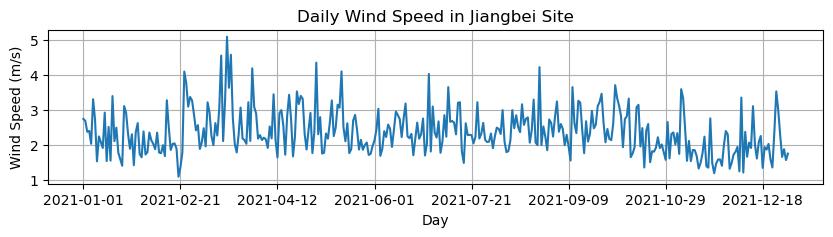

In [26]:
## Quality control

# 1. Drop direction_angle == 999
Jiangbei_df = Jiangbei_df[Jiangbei_df['direction_angle'] != 999]

# 2. Drop direction_quality in [2,3,6,7]
Jiangbei_df = Jiangbei_df[~Jiangbei_df['direction_quality'].isin(['2', '3', '6', '7'])]

# 3. Drop type == 9
Jiangbei_df = Jiangbei_df[Jiangbei_df['type'] != '9']

# 4. Drop speed_quality in [2,3,6,7]
Jiangbei_df = Jiangbei_df[~Jiangbei_df['speed_quality'].isin(['2', '3', '6', '7'])]

## Plot
Jiangbei_df.groupby('yyyymmdd')['speed'].mean().plot(figsize=(10,2),
                                                     title='Daily Wind Speed in Jiangbei Site',
                                                     ylabel='Wind Speed (m/s)',
                                                     xlabel='Day',
                                                     grid=True)

<Axes: title={'center': 'Daily Temperature in Jiangbei Site'}, xlabel='Day', ylabel='Temperature ($^\\circ$C)'>

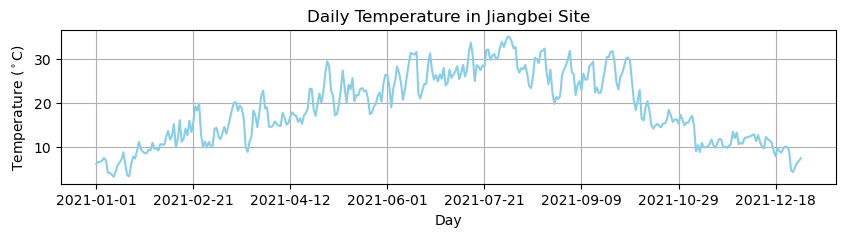

In [28]:
## Quality control

# Drop tmp_quality != 1
Jiangbei_df = Jiangbei_df[Jiangbei_df['tmp_quality'] == 1]

## Plot
Jiangbei_df.groupby('yyyymmdd')['tmp_value'].mean().plot(figsize=(10,2),
                                                         title='Daily Temperature in Jiangbei Site',
                                                         ylabel=r'Temperature ($^\circ$C)',
                                                         xlabel='Day',
                                                         grid=True,
                                                         color='skyblue')

<Axes: title={'center': 'Daily Dew Temperature in Jiangbei Site'}, xlabel='Day', ylabel='Dew Temperature ($^\\circ$C)'>

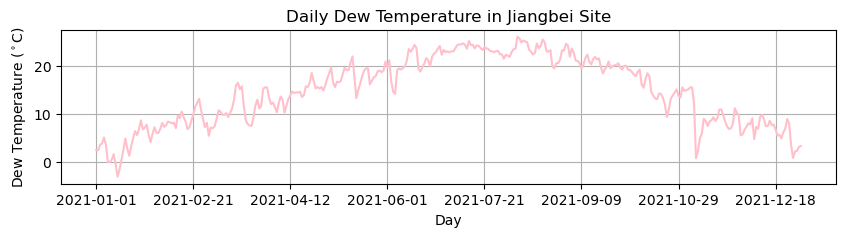

In [29]:
## Quality control

# Drop tmp_quality != 1
Jiangbei_df = Jiangbei_df[Jiangbei_df['dew_quality'] == 1]

## Plot
Jiangbei_df.groupby('yyyymmdd')['dew_value'].mean().plot(figsize=(10,2),
                                                         title='Daily Dew Temperature in Jiangbei Site',
                                                         ylabel=r'Dew Temperature ($^\circ$C)',
                                                         xlabel='Day',
                                                         grid=True,
                                                         color='pink')

<font color='orange'>Actually, I can show tmp and dew in the same picture, but there's no time to polish my code...

<Axes: title={'center': 'Daily Sea Level Pressure in Jiangbei Site'}, xlabel='Day', ylabel='SLP (hPa)'>

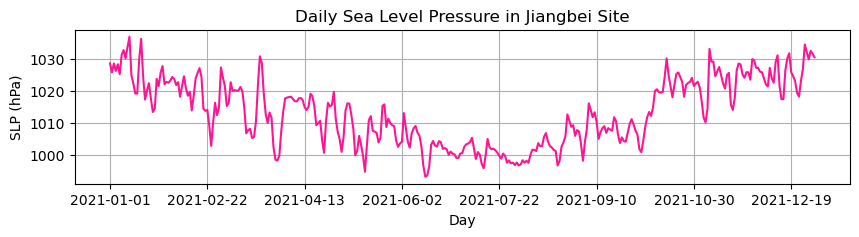

In [30]:
## Quality control

# Drop tmp_quality != 1
Jiangbei_df = Jiangbei_df[Jiangbei_df['slp_quality'] == 1]

## Plot
Jiangbei_df.groupby('yyyymmdd')['slp_value'].mean().plot(figsize=(10,2),
                                                         title='Daily Sea Level Pressure in Jiangbei Site',
                                                         ylabel='SLP (hPa)',
                                                         xlabel='Day',
                                                         grid=True,
                                                         color='deeppink')

## ANS. 3.3

In [31]:
print('In Jiangbei site, during the whole 2021, the following average values are shown:\n')

speed_mean_yyyy = Jiangbei_df['speed'].mean()
print('1. The average wind speed is','%.3f'%speed_mean_yyyy,'m/s\n')

tmp_mean_yyyy = Jiangbei_df['tmp_value'].mean()
print('2. The average temperatue is','%.3f'%tmp_mean_yyyy,'\u00b0C.')

dew_mean_yyyy = Jiangbei_df['dew_value'].mean()
print('3. The average dew point temperature is','%.3f'%dew_mean_yyyy,'\u00b0C.')
print('The temperature is close to the dew point temperature, indicating the relative humidity is high.\n')

slp_mean_yyyy = Jiangbei_df['slp_value'].mean()
print('4. The average sea level pessure is','%.3f'%slp_mean_yyyy,'hPa.')

In Jiangbei site, during the whole 2021, the following average values are shown:

1. The average wind speed is 1.126 m/s

2. The average temperatue is 19.463 °C.
3. The average dew point temperature is 14.627 °C.
The temperature is close to the dew point temperature, indicating the relative humidity is high.

4. The average sea level pessure is 1013.628 hPa.


In [32]:
print('In Jiangbei site, during the whole 2021, the maximum values are shown:\n')

speed_max_yyyy = Jiangbei_df['speed'].max()
speed_max_date = Jiangbei_df.at[Jiangbei_df['speed'].idxmax(), 'DATE']
print('5. The maximum wind speed','%.3f'%speed_max_yyyy,'m/s occurred at', speed_max_date)

tmp_max_yyyy = Jiangbei_df['tmp_value'].max()
tmp_max_date = Jiangbei_df.at[Jiangbei_df['tmp_value'].idxmax(), 'DATE']
print('6. The maximum temperatue','%.3f'%tmp_max_yyyy,'\u00b0C occurred at', tmp_max_date)

dew_max_yyyy = Jiangbei_df['dew_value'].max()
dew_max_date = Jiangbei_df.at[Jiangbei_df['dew_value'].idxmax(), 'DATE']
print('7. The maximum dew point temperature','%.3f'%dew_max_yyyy,'\u00b0C occurred at', dew_max_date)

slp_max_yyyy = Jiangbei_df['slp_value'].max()
slp_max_date = Jiangbei_df.at[Jiangbei_df['slp_value'].idxmax(), 'DATE']
print('8. The maximum  sea level pessure','%.3f'%slp_max_yyyy,'hPa occurred at', slp_max_date)

In Jiangbei site, during the whole 2021, the maximum values are shown:

5. The maximum wind speed 5.000 m/s occurred at 2021-05-02T15:00:00
6. The maximum temperatue 40.700 °C occurred at 2021-08-03T09:00:00
7. The maximum dew point temperature 26.600 °C occurred at 2021-08-21T15:00:00
8. The maximum  sea level pessure 1040.900 hPa occurred at 2021-01-17T03:00:00


In [33]:
# Choose 4 values!!!
NewJiangbei_df = Jiangbei_df[['speed','direction_angle','tmp_value','dew_value','slp_value']]

# Make a new column
NewJiangbei_df['wind_direction'] = 'N'

# Assign wind directions
NewJiangbei_df.loc[ (NewJiangbei_df['direction_angle'] <= 135 ) & (NewJiangbei_df['direction_angle'] > 45 ), ['wind_direction'] ] = 'E'
NewJiangbei_df.loc[ (NewJiangbei_df['direction_angle'] <= 225 ) & (NewJiangbei_df['direction_angle'] > 135 ), ['wind_direction'] ] = 'S'
NewJiangbei_df.loc[ (NewJiangbei_df['direction_angle'] <= 315 ) & (NewJiangbei_df['direction_angle'] > 225 ), ['wind_direction'] ] = 'W'

NewJiangbei_df

C:\Users\Wu\AppData\Local\Temp\ipykernel_43456\2920269344.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewJiangbei_df['wind_direction'] = 'N'


,speed,direction_angle,tmp_value,dew_value,slp_value,wind_direction
0,1.0,320.0,6.0,4.5,1031.9,N
4,1.0,310.0,6.3,4.5,1031.8,W
8,1.0,260.0,8.4,3.3,1028.2,W
12,1.0,40.0,9.9,0.2,1025.5,N
16,3.0,330.0,7.1,2.4,1027.9,N
...,...,...,...,...,...,...
11490,0.9,249.0,9.5,3.0,1027.6,W
11494,1.4,290.0,8.7,3.0,1030.1,W
11498,0.4,283.0,8.5,3.3,1031.8,W
11502,0.7,287.0,8.0,3.5,1032.1,W


In [34]:
# Group by wind_direction
NewJiangbei_df.groupby(['wind_direction']).mean()

,speed,direction_angle,tmp_value,dew_value,slp_value
wind_direction,,,,,
E,1.109693,81.517730,22.528842,14.552719,1012.209929
N,1.119777,295.067658,19.407955,15.055093,1013.790409
S,1.242132,176.685279,20.824365,14.809645,1012.627919
W,1.114770,291.033875,17.442818,13.842005,1014.411924


<font color=orange>The above table shows the mean wind speed, temperature, dew point temperature, sea level pressure in 4 wind direction.

### 代码运行结果正确，数据预处理正确，绘制图件正确，统计检查正确，分析结果丰富。👍
### 得分 16/15
### ---------------------------------------------------------------------------------------------